## 컴퓨터과학과 201810954 안지민



In [38]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### Exercise 3.3

Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then
make a wave with duration 1 and framerate 20 kHz.  Draw a sketch of
what you think the spectrum will look like.  Then plot the
spectrum and see if you got it right.

### Solution
2500부터 3000Hz 범위 내에서는 Eye of Sauron 처럼 나오는 것을 예상했다.(Eye of Sauron : 아래 사진 참고)

5000~6000Hz 범위내의 첫 번째 하모닉은 Outhouse of Sauron와 같이 더 짧은 tower가 나오는 것을 예상했으며,

7500~9000Hz 범위내의 두 번째 하모닉은 Patio of Sauron 와 같이 이전보다 더 짧게 나오는 것을 예상했다.

다른 하모닉들은 모든곳에 aliased 되었기때문에 나는 다른 모든 주파수들에서 몇 에너지를 볼 수 있기를 기대했으며,

이러한 분산된 에너지들은 흥미로운 소리를 생성해낸다.


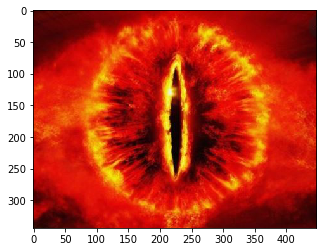

In [51]:
img = imread('eye_of_sauron.JPG')

plt.imshow(img)
plt.show()



In [52]:
signal = SawtoothChirp(start=2500, end=3000) #2500~3000Hz의 swatooth chirp 생성
wave = signal.make_wave(duration=1, framerate=20000) #duration 1, framerate 20k(10^3)Hz 생성
wave.make_audio() #audio 파일 생성

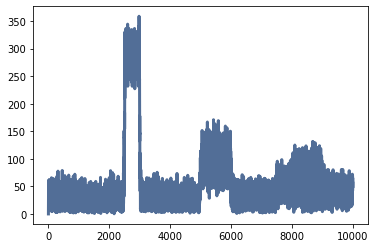

In [53]:
wave.make_spectrum().plot()

### Exercise 

In musical terminology, a “glissando” is a note that slides from one pitch to another, so it is similar to a chirp. Find or make a recording of a glissando and plot its spectrogram.  

One suggestion: George Gershwin's *Rhapsody in Blue* starts with a famous clarinet glissando; you can download a recording from http://archive.org/details/rhapblue11924.

In [11]:
wave = thinkdsp.read_wave('72475__rockwehrmann__glissup02.wav')
wave.make_audio()

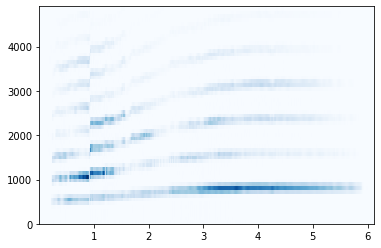

In [12]:
wave.make_spectrogram(512).plot(high=5000)

### Exercise 

A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length.
Assuming that the player moves the slide at a constant speed, how
does frequency vary with time?  

Write a class called `TromboneGliss` that extends `Chirp` and
provides `evaluate`.  Make a wave that simulates a trombone
glissando from F3 down to C3 and back up to F3.  C3 is 262 Hz; F3 is
349 Hz.

Plot a spectrogram of the resulting wave.  Is a trombone glissando
more like a linear or exponential chirp?

In [ ]:
class TromboneGliss(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

Here's the first part of the wave:

In [ ]:
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

And the second part:

In [ ]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Putting them together:

In [ ]:
wave = wave1 | wave2
wave.make_audio()

Here's the spectrogram:

In [ ]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)

### Exercise

Make or find a recording of a series of vowel sounds and look at the
spectrogram.  Can you identify different vowels?

In [ ]:
wave = thinkdsp.read_wave('87778__marcgascon7__vocals.wav')
wave.make_audio()

In [ ]:
wave.make_spectrogram(1024).plot(high=1000)

The stripe across the bottom is probably background noise.  The peaks in the spectrogram are called "formants".

In general, vowel sounds are distinguished by the amplitude ratios of the first two formants relative to the fundamental.  For more, see https://en.wikipedia.org/wiki/Formant

We can see the formats more clearly by selecting a segment during 'ah'.

In [ ]:
high = 1000
thinkplot.preplot(5)

segment = wave.segment(start=1, duration=0.25)
segment.make_spectrum().plot(high=high)

The fundamental is near 100 Hz.  The next highest peaks are at 200 Hz and 700 Hz.  People who know more about this than I do can identify vowels by looking at spectrums, but I can't.

The 'eh' segment has a high-amplitude formant near 500 Hz.

In [ ]:
segment = wave.segment(start=2.2, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'ih' segment has no high frequency components.

In [ ]:
segment = wave.segment(start=3.5, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'oh' segment has a high-amplitude formant near 500 Hz, even higher than the fundamental.

In [ ]:
segment = wave.segment(start=5.1, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'oo' segment has a high-amplitude formant near 300 Hz and no high-frequency components

In [ ]:
segment = wave.segment(start=6.5, duration=0.25)
segment.make_spectrum().plot(high=high)